In [1]:
import os
import pandas as pd
import shapely
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
FP_path = pd.read_csv('./AAG-FP_metadata.csv')
FP_path

,folder_ID,img_ID,img_url,project_url,Category
0,Airport-Offices_1122_14,2011_06_ATTC___A3_1_250_2nd_floor_20,https://images.adsttc.com/media/images/52a9/1f...,https://www.archdaily.com/457115/air-traffic-c...,Airport
1,Airport-Rest area_245_8,ROV_pl_26_39,https://images.adsttc.com/media/images/5d1f/56...,https://www.archdaily.com/920484/platov-busine...,Airport
2,Airport_1333_4,stringio_28,https://images.adsttc.com/media/images/500f/96...,https://www.archdaily.com/257323/108-dwellings...,Airport
3,Airport_1343_10,stringio_11,https://images.adsttc.com/media/images/5018/87...,https://www.archdaily.com/246654/carroll-count...,Airport
4,Airport_1429_12,stringio_17,https://images.adsttc.com/media/images/5015/de...,https://www.archdaily.com/172247/tag-farnborou...,Airport
...,...,...,...,...,...
17379,zoo-Offices_1556_22,stringio_12,https://images.adsttc.com/media/images/5009/60...,https://www.archdaily.com/68921/zoo-management...,zoo
17380,zoo_1417_15,stringio_34,https://images.adsttc.com/media/images/5016/5a...,https://www.archdaily.com/181783/the-wellingto...,zoo
17381,zoo_1555_3,stringio_23,https://images.adsttc.com/media/images/5012/4e...,https://www.archdaily.com/70629/adelaide-zoo-e...,zoo
17382,zoo_1558_0,stringio_27,https://images.adsttc.com/media/images/5009/53...,https://www.archdaily.com/67789/zoo-nursery-ca...,zoo


In [3]:
dir = './AAG-FP_dataset' #the directory where you put the dataset

for index, row in FP_path.iterrows():
    path = os.path.join(dir, row['folder_ID'], row['img_ID'])
    G_n = nx.read_gpickle(os.path.join(path,"G_n.gpickle"))
    G_m = nx.read_gpickle(os.path.join(path,"G_m.gpickle"))
    break # load the 1st floor plan as example
    

In [4]:
def draw_simple_graph(G_n):
    labeldict = {}
    for i in range(len(G_n.nodes)):
        if G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'rooms':
            labeldict[list(G_n.nodes)[i]] = f"{G_n.nodes[list(G_n.nodes)[i]]['class_name']}_{int(round(G_n.nodes[list(G_n.nodes)[i]]['area_ratio']*100))}%"
        else:
            labeldict[list(G_n.nodes)[i]] = G_n.nodes[list(G_n.nodes)[i]]['class_name']

    posdict = {}
    for i in range(len(G_n.nodes)):
        if G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'outside':
            posdict[list(G_n.nodes)[i]] = (0,0)
        # elif G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'stairs':
            # posdict[list(G_n.nodes)[i]] = (0,-h)
        else:    
            posdict[list(G_n.nodes)[i]] = G_n.nodes[list(G_n.nodes)[i]]['point']

    nodes_color = []
    for i in range(len(G_n.nodes)):
        if G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'outside':
            nodes_color.append('#CCCCCC')
        if G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'rooms':
            nodes_color.append('#F6D55C')
        if G_n.nodes[list(G_n.nodes)[i]]['class_name'] == 'stairs':
            nodes_color.append('#ED553B')

    edges_color = []
    for i in G_n.edges:
        if G_n.edges[i]['edge_class'] == 'window':
            edges_color.append('#3CAEA3')
        if G_n.edges[i]['edge_class'] == 'door':
            edges_color.append('#F67E7D')
        if G_n.edges[i]['edge_class'] == 'direct':
            edges_color.append('#173F5F')
        if G_n.edges[i]['edge_class'] == 'wall':
            edges_color.append('#AAAAAA')

    edges_label = {}
    for i in G_n.edges:
        edges_label[i] = G_n.edges[i]['edge_class']

    plt.figure(figsize=(12,7))
    nx.draw(G_n, labels=labeldict, with_labels = True, pos = posdict, width= 3, node_size=2000, node_color = nodes_color, edge_color = edges_color, font_weight='bold')
    nx.draw_networkx_edge_labels(G_n,pos = posdict,
                                edge_labels=edges_label,
                                font_color='black')
    plt.axis('off')

C:\ProgramData\Anaconda3\envs\shapely\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\envs\shapely\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


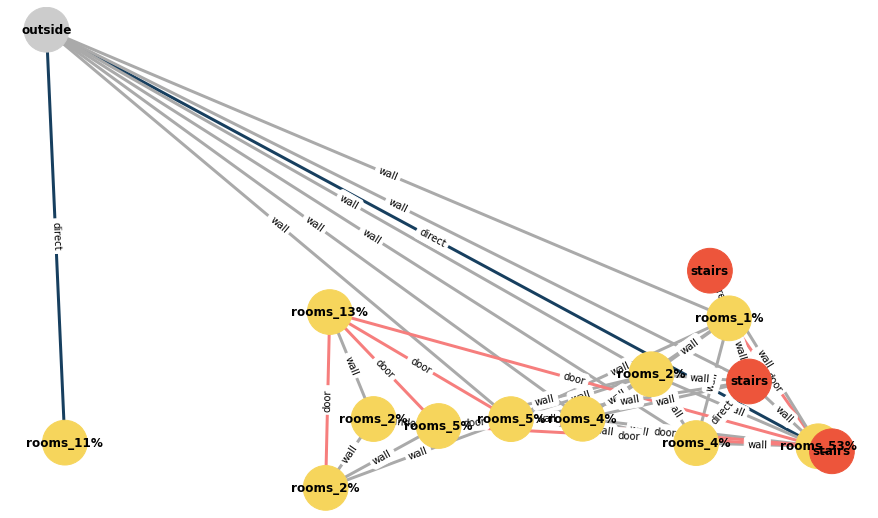

In [5]:
draw_simple_graph(G_n)

In [6]:
def draw_multigraph(G_m):
    labeldict = {}
    for i in range(len(G_m.nodes)):
        if G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'rooms':
            labeldict[list(G_m.nodes)[i]] = f"{G_m.nodes[list(G_m.nodes)[i]]['class_name']}_{int(round(G_m.nodes[list(G_m.nodes)[i]]['area_ratio']*100))}%"
        else:
            labeldict[list(G_m.nodes)[i]] = G_m.nodes[list(G_m.nodes)[i]]['class_name']

    posdict = {}
    for i in range(len(G_m.nodes)):
        if G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'outside':
            posdict[list(G_m.nodes)[i]] = (0,0)
        # elif G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'stairs':
            # posdict[list(G_m.nodes)[i]] = (0,-h)
        else:    
            posdict[list(G_m.nodes)[i]] = G_m.nodes[list(G_m.nodes)[i]]['point']

    nodes_color = []
    for i in range(len(G_m.nodes)):
        if G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'outside':
            nodes_color.append('#CCCCCC')
        if G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'rooms':
            nodes_color.append('#F6D55C')
        if G_m.nodes[list(G_m.nodes)[i]]['class_name'] == 'stairs':
            nodes_color.append('#ED553B')

    plt.figure(figsize=(12,7))
    ax = plt.gca()
    i = 0
    for e in G_m.edges:
        if list(G_m.edges.data())[i][-1]['edge_class'] == 'wall':
            ax.annotate("",
                        xy=posdict[e[0]], xycoords='data',
                        xytext=posdict[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="wedge", # wedge
                                        color="#AAAAAA",
                                        shrinkA=25, shrinkB=25,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.05*e[2])),
                                        ),
                        )
        if list(G_m.edges.data())[i][-1]['edge_class'] == 'window':
            ax.annotate("",
                        xy=posdict[e[0]], xycoords='data',
                        xytext=posdict[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="wedge", # wedge
                                        color="#3CAEA3",
                                        shrinkA=25, shrinkB=25,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.05*e[2])),
                                        ),
                        )
        if list(G_m.edges.data())[i][-1]['edge_class'] == 'door':
            ax.annotate("",
                        xy=posdict[e[0]], xycoords='data',
                        xytext=posdict[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="wedge", # wedge
                                        color="#F67E7D",
                                        shrinkA=25, shrinkB=25,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.05*e[2])),
                                        ),
                        )
        if list(G_m.edges.data())[i][-1]['edge_class'] == 'direct':
            ax.annotate("",
                        xy=posdict[e[0]], xycoords='data',
                        xytext=posdict[e[1]], textcoords='data',
                        arrowprops=dict(arrowstyle="wedge", # wedge
                                        color="#173F5F",
                                        shrinkA=25, shrinkB=25,
                                        patchA=None, patchB=None,
                                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.05*e[2])),
                                        ),
                        )
        i += 1
    nx.draw(G_m, labels=labeldict, with_labels = True, pos = posdict, width= 0, node_size=2000, node_color = nodes_color, font_weight='bold')
    plt.axis('off')

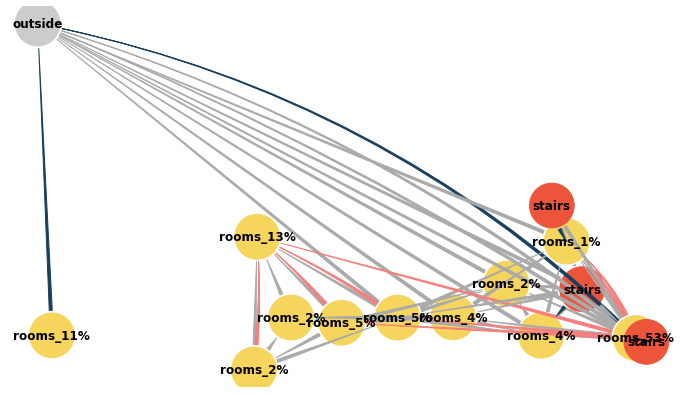

In [7]:
draw_multigraph(G_m)